In [1]:
import pyarrow

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
import pandas as pd
import polars as pl
from datetime import datetime 
import seaborn as sns

In [8]:
fnames = ['Divvy_Trips_2019_Q2.csv', 'Divvy_Trips_2019_Q3.csv', 'Divvy_Trips_2019_Q4.csv', 'Divvy_Trips_2020_Q1.csv'] 

## data collecting

In [9]:
df2 = pl.read_csv('Downloads/Divvy_Trips_2019_Q2.csv')
df3 = pl.read_csv('Downloads/Divvy_Trips_2019_Q3.csv')
df4 = pl.read_csv('Downloads/Divvy_Trips_2019_Q4.csv')

In [16]:
df2.head()

01 - Rental Details Rental ID,start_time,end_time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,usertype,Member Gender,05 - Member Details Member Birthday Year
i64,str,str,i64,str,i64,str,i64,str,str,str,i64
22178529,"""2019-04-01 00:…","""2019-04-01 00:…",6251,"""446.0""",81,"""Daley Center P…",56,"""Desplaines St …","""Subscriber""","""Male""",1975
22178530,"""2019-04-01 00:…","""2019-04-01 00:…",6226,"""1,048.0""",317,"""Wood St & Tayl…",59,"""Wabash Ave & R…","""Subscriber""","""Female""",1984
22178531,"""2019-04-01 00:…","""2019-04-01 00:…",5649,"""252.0""",283,"""LaSalle St & J…",174,"""Canal St & Mad…","""Subscriber""","""Male""",1990
22178532,"""2019-04-01 00:…","""2019-04-01 00:…",4151,"""357.0""",26,"""McClurg Ct & I…",133,"""Kingsbury St &…","""Subscriber""","""Male""",1993
22178533,"""2019-04-01 00:…","""2019-04-01 00:…",3270,"""1,007.0""",202,"""Halsted St & 1…",129,"""Blue Island Av…","""Subscriber""","""Male""",1992


In [10]:
df2 =  df2.rename({'01 - Rental Details Local Start Time': 'start_time', 
                 '01 - Rental Details Local End Time': 'end_time',
                 'User Type': 'usertype'})

In [11]:
cols = ['start_time', 'end_time', 'usertype']

In [12]:
data = pl.concat([df2[cols],
                  df3[cols],
                  df4[cols]])

In [13]:
time_cols = ['start_time', 'end_time']

data = data.with_columns(
    [pl.col(time_cols).str.strptime(
            pl.Datetime,
            format='%Y-%m-%d %H:%M:%S', strict=False)
     ] 
    )


In [14]:
data = data.with_columns(pl.col('start_time').dt.hour().alias("start_hour"))

In [26]:
data = data.with_columns(delta = (pl.col('end_time') - pl.col('start_time')).dt.hours())

<Axes: xlabel='start_hour', ylabel='delta'>

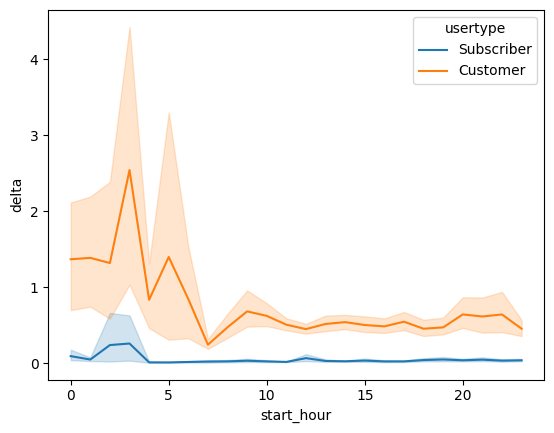

In [51]:
sns.lineplot(data=data.to_pandas(), x='start_hour', y='delta', hue='usertype')

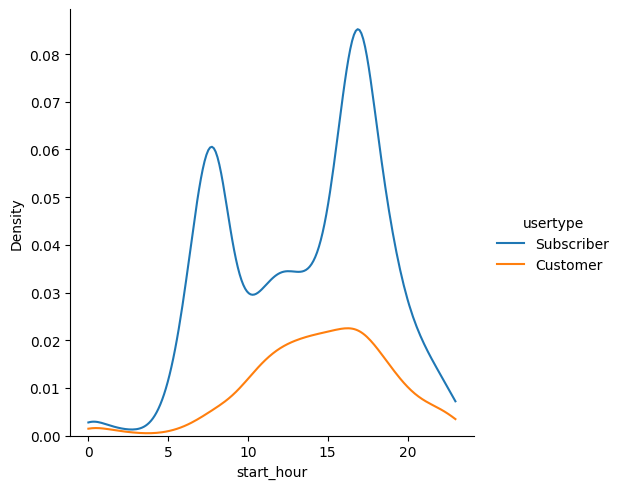

In [49]:
sns.displot(x= 'start_hour', 
            data=data.filter(pl.col('delta')<2).to_pandas(),  hue='usertype', kind="kde",
           bw_adjust=3, cut=0)

In [ ]:
g = sns.jointplot(
    data=data.to_pandas(),
    x="delta", y="bill_depth_mm", hue="species",
    kind="kde",
)

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


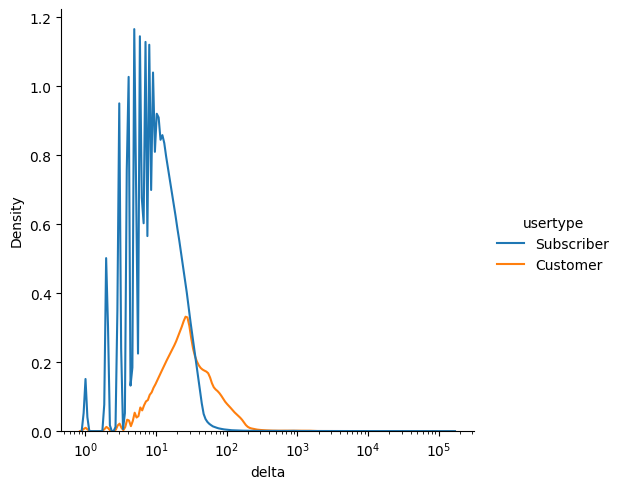

In [24]:
sns.displot(x= 'delta', data=data.to_pandas(),  hue='usertype', kind="kde", log_scale=True)

## Q1

In [72]:
df = pl.read_csv('Downloads/Divvy_Trips_2020_Q1.csv')

In [74]:
df =  df.rename({'started_at': 'start_time', 
                 'ended_at': 'end_time',
                 #'member_casual': 'usertype'
                })

In [76]:
time_cols = ['start_time', 'end_time']

df = df.with_columns(
    [pl.col(time_cols).str.strptime(
            pl.Datetime,
            format='%Y-%m-%d %H:%M:%S', strict=False)
     ] 
    )


In [77]:
df = df.with_columns(pl.col('start_time').dt.hour().alias("start_hour"))

/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

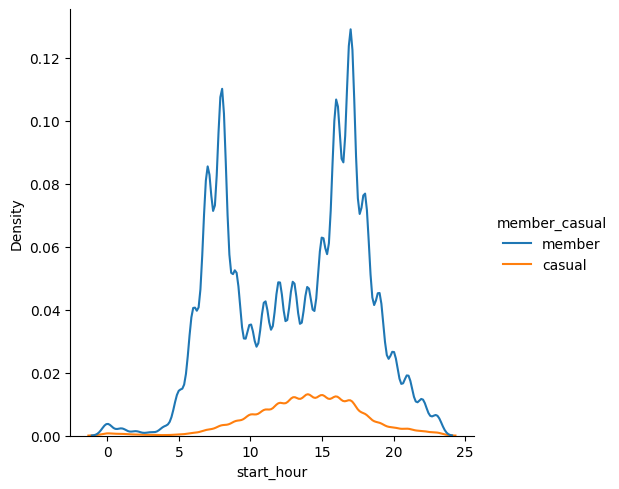

In [78]:
sns.displot(x= 'start_hour', data=df,  hue='member_casual', kind="kde")